<center><h2> Advanced Corporate Finance - Asset Management </h2></center>

### Problem Statement: Analyze the effect of fund size on performance of mutual funds for small caps. Access and download data from WRDS, aggregate it, and sort funds based on size and value.

In [ ]:
import pandas as pd
import warnings
import pandas_profiling as pp
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
# Extracted data from WRDS
summary = pd.read_csv('FundSummary.csv')
# Using the lipper_obj_name column to determine if the fund is investing in small-caps
summary.dropna(subset = ['lipper_obj_name'], inplace = True)
summary

,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,crsp_portno,ticker,mgmt_fee,lipper_obj_name
0,Q,1,19990331,14.84,19990331,NaN,AABIX,0.084,Corporate Debt Funds BBB-Rated
1,Q,1,19990630,14.4,19990630,NaN,AABIX,0.084,Corporate Debt Funds BBB-Rated
2,Q,1,19990930,14.18,19990930,NaN,AABIX,0.084,Corporate Debt Funds BBB-Rated
3,AQ,1,19991231,13.97,19991231,NaN,AABIX,NaN,Corporate Debt Funds BBB-Rated
4,Q,1,20000331,13.89,20000331,NaN,AABIX,NaN,Corporate Debt Funds BBB-Rated
...,...,...,...,...,...,...,...,...,...
2310916,Q,98673,20210630,15.04,20210630,NaN,LTAGX,NaN,INTERNATIONAL FUNDS
2310917,Q,98674,20210630,15.04,20210630,NaN,LAVGX,NaN,INTERNATIONAL FUNDS
2310918,Q,98678,20210630,25.0,20210628,NaN,DYLD,NaN,MULTI-SECTOR INCOME FUNDS
2310919,Q,98679,20210630,9.91,20210630,NaN,CCMMX,NaN,MID-CAP FUNDS


In [ ]:
sm = []
logic = summary['lipper_obj_name'].unique()
for i in logic:
    if 'small' in i.lower():
        sm.append(i)
# List of identifiers for small caps
sm


['Small-Cap Funds',
 'Global Small-Cap Funds',
 'International Small-Cap Funds',
 'SMALL-CAP FUNDS',
 'INTERNATIONAL SMALL-CAP FUNDS',
 'GLOBAL SMALL-CAP FUNDS']

In [ ]:
# Extracting small-cap funds from full list of funds
small_caps = summary[summary['lipper_obj_name'].isin(sm)]
small_caps

,summary_period2,crsp_fundno,caldt,nav_latest,nav_latest_dt,crsp_portno,ticker,mgmt_fee,lipper_obj_name
712,Q,292,19990331,6.56,19990331,NaN,CFSVX,0.531,Small-Cap Funds
713,Q,292,19990630,7.93,19990630,NaN,CFSVX,0.531,Small-Cap Funds
714,Q,292,19990930,7.11,19990930,NaN,CFSVX,0.531,Small-Cap Funds
715,AQ,292,19991231,7.27,19991231,NaN,CFSVX,NaN,Small-Cap Funds
716,Q,292,20000331,7.15,20000331,NaN,CFSVX,NaN,Small-Cap Funds
...,...,...,...,...,...,...,...,...,...
2310790,Q,98519,20210630,9.88,20210630,1052448.0,FSISX,NaN,INTERNATIONAL SMALL-CAP FUNDS
2310810,Q,98539,20210630,13.37,20210630,1051177.0,FHSRX,NaN,GLOBAL SMALL-CAP FUNDS
2310828,Q,98560,20210630,20.87,20210630,1050201.0,PBSYX,NaN,SMALL-CAP FUNDS
2310890,Q,98637,20210630,21.81,20210630,1024692.0,NaN,NaN,SMALL-CAP FUNDS


In [ ]:
print('There are', len(small_caps['crsp_fundno'].unique()), 'small-cap mutual funds in this dataset.')

There are 4092 small-cap mutual funds in this dataset.


In [ ]:
# Monthly returns of all mutual funds
monthly_returns = pd.read_csv('MonthlyReturn.csv')
monthly_returns[monthly_returns['crsp_fundno'].isin(small_caps['crsp_fundno'].unique())]

,caldt,crsp_fundno,mtna,mret,mnav
23096,19980227,292,0.100,NaN,NaN
23097,19980331,292,44.330,R,10.3800000
23098,19980430,292,55.462,-0.003854,10.3400000
23099,19980529,292,55.575,-0.059961,9.7200000
23100,19980630,292,53.860,-0.045267,9.2800000
...,...,...,...,...,...
8497673,20210331,98637,NaN,0.000413,24.23
8497674,20210430,98637,NaN,0.038382,25.16
8497675,20210528,98637,4.2,-0.030207,24.4
8497676,20210630,98637,NaN,0.017994,21.81


In [ ]:
# Getting all the small-cap funds
funds = small_caps[['crsp_fundno', 'lipper_obj_name']].reset_index(drop = True)
funds.drop_duplicates(inplace=True)
funds

,crsp_fundno,lipper_obj_name
0,292,Small-Cap Funds
6,389,Small-Cap Funds
7,392,Small-Cap Funds
8,393,Small-Cap Funds
9,481,Global Small-Cap Funds
...,...,...
150412,98519,INTERNATIONAL SMALL-CAP FUNDS
150413,98539,GLOBAL SMALL-CAP FUNDS
150414,98560,SMALL-CAP FUNDS
150415,98637,SMALL-CAP FUNDS


In [ ]:
# Monthly returns of small-cap funds
small_monthly = monthly_returns.merge(funds, left_on = 'crsp_fundno', right_on = 'crsp_fundno')
small_monthly

,caldt,crsp_fundno,mtna,mret,mnav,lipper_obj_name
0,19980227,292,0.100,NaN,NaN,Small-Cap Funds
1,19980331,292,44.330,R,10.3800000,Small-Cap Funds
2,19980430,292,55.462,-0.003854,10.3400000,Small-Cap Funds
3,19980529,292,55.575,-0.059961,9.7200000,Small-Cap Funds
4,19980630,292,53.860,-0.045267,9.2800000,Small-Cap Funds
...,...,...,...,...,...,...
922204,20210331,98637,NaN,0.000413,24.23,SMALL-CAP FUNDS
922205,20210430,98637,NaN,0.038382,25.16,SMALL-CAP FUNDS
922206,20210528,98637,4.2,-0.030207,24.4,SMALL-CAP FUNDS
922207,20210630,98637,NaN,0.017994,21.81,SMALL-CAP FUNDS


In [ ]:
# Cleaning data
small_monthly['mret'] = pd.to_numeric(small_monthly['mret'], errors = 'coerce')
small_monthly['mtna'] = pd.to_numeric(small_monthly['mtna'], errors = 'coerce')
small_monthly.dropna(subset=['mret', 'mtna'], inplace = True)
small_monthly['caldt'] = pd.to_datetime(small_monthly['caldt'], format = '%Y%m%d')
small_monthly

,caldt,crsp_fundno,mtna,mret,mnav,lipper_obj_name
2,1998-04-30,292,55.462,-0.003854,10.3400000,Small-Cap Funds
3,1998-05-29,292,55.575,-0.059961,9.7200000,Small-Cap Funds
4,1998-06-30,292,53.860,-0.045267,9.2800000,Small-Cap Funds
5,1998-07-31,292,42.274,-0.113147,8.2300000,Small-Cap Funds
6,1998-08-31,292,32.765,-0.182260,6.7300000,Small-Cap Funds
...,...,...,...,...,...,...
922120,2021-06-30,98437,0.200,0.019030,16.6,SMALL-CAP FUNDS
922122,2021-06-30,98504,6.400,-0.003824,25.6107,SMALL-CAP FUNDS
922124,2021-06-30,98519,834.100,-0.017893,9.88,INTERNATIONAL SMALL-CAP FUNDS
922127,2021-06-30,98560,0.100,0.084719,20.87,SMALL-CAP FUNDS


In [ ]:
# Grouping into 5 bins
labels = ['tiny', 'small', 'medium', 'big', 'huge']
small_monthly['group'] = small_monthly.groupby('caldt')['mtna'].apply(pd.cut, bins = 5, labels = labels)
small_monthly

,caldt,crsp_fundno,mtna,mret,mnav,lipper_obj_name,group
2,1998-04-30,292,55.462,-0.003854,10.3400000,Small-Cap Funds,tiny
3,1998-05-29,292,55.575,-0.059961,9.7200000,Small-Cap Funds,tiny
4,1998-06-30,292,53.860,-0.045267,9.2800000,Small-Cap Funds,tiny
5,1998-07-31,292,42.274,-0.113147,8.2300000,Small-Cap Funds,tiny
6,1998-08-31,292,32.765,-0.182260,6.7300000,Small-Cap Funds,tiny
...,...,...,...,...,...,...,...
922120,2021-06-30,98437,0.200,0.019030,16.6,SMALL-CAP FUNDS,tiny
922122,2021-06-30,98504,6.400,-0.003824,25.6107,SMALL-CAP FUNDS,tiny
922124,2021-06-30,98519,834.100,-0.017893,9.88,INTERNATIONAL SMALL-CAP FUNDS,tiny
922127,2021-06-30,98560,0.100,0.084719,20.87,SMALL-CAP FUNDS,tiny


In [ ]:
small_monthly['group'].value_counts()

tiny      832529
small       6152
medium      1894
huge        1342
big          647
Name: group, dtype: int64

In [ ]:
grouped_data = small_monthly.groupby(['caldt', 'group']).mean()[['mtna', 'mret']]
grouped_data

mtna      mret
caldt      group                         
1962-12-31 tiny        2.975000 -0.020356
           small      46.100000  0.075188
           medium           NaN       NaN
           big              NaN       NaN
           huge      161.500000  0.001630
...                         ...       ...
2021-06-30 tiny      471.458365  0.008310
           small   20461.650000  0.011869
           medium  38220.400000  0.020997
           big     52811.600000  0.014301
           huge    70635.850000  0.011287

[2385 rows x 2 columns]

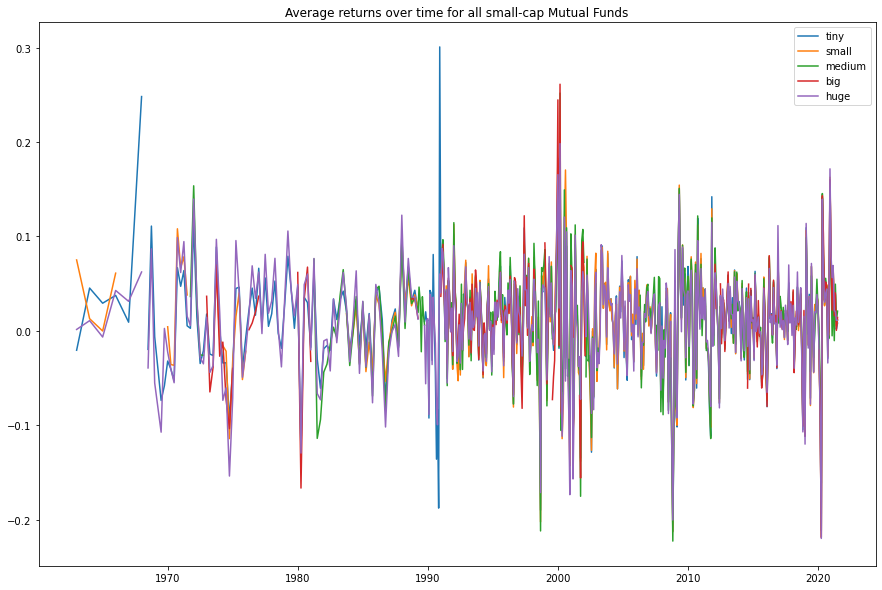

In [ ]:
grouped_reset = grouped_data.reset_index()

plt.figure(figsize = [15,10])
for i in labels:
    plt.plot(grouped_reset[grouped_reset['group'] == i]['caldt'], grouped_reset[grouped_reset['group'] == i]['mret'],
             label = i)
plt.title('Average returns over time for all small-cap Mutual Funds')
plt.legend()
plt.show()

In [ ]:
grouped_reset.dropna(subset=['mret'], inplace=True)
grouped_reset 

,caldt,group,mtna,mret
0,1962-12-31,tiny,2.975000,-0.020356
1,1962-12-31,small,46.100000,0.075188
4,1962-12-31,huge,161.500000,0.001630
5,1963-12-31,tiny,3.483333,0.045433
6,1963-12-31,small,52.300000,0.012987
...,...,...,...,...
2380,2021-06-30,tiny,471.458365,0.008310
2381,2021-06-30,small,20461.650000,0.011869
2382,2021-06-30,medium,38220.400000,0.020997
2383,2021-06-30,big,52811.600000,0.014301


In [ ]:
# Creating dataframes of each size
tiny = grouped_reset[grouped_reset['group'] == labels[0]]
small = grouped_reset[grouped_reset['group'] == labels[1]]
medium = grouped_reset[grouped_reset['group'] == labels[2]]
large = grouped_reset[grouped_reset['group'] == labels[3]]
huge = grouped_reset[grouped_reset['group'] == labels[4]]

In [ ]:
tiny.reset_index(drop = True, inplace = True)
tiny['value'] = 1000000
for i in range(len(tiny)):
    if i>0:
        tiny['value'].loc[i] = tiny['value'].loc[i-1]* (1 + tiny['mret'].loc[i])
tiny

,caldt,group,mtna,mret,value
0,1962-12-31,tiny,2.975000,-0.020356,1.000000e+06
1,1963-12-31,tiny,3.483333,0.045433,1.045433e+06
2,1964-12-31,tiny,3.140000,0.029410,1.076179e+06
3,1965-12-31,tiny,4.840000,0.037680,1.116729e+06
4,1966-12-30,tiny,14.346154,0.009298,1.127113e+06
...,...,...,...,...,...
467,2021-02-26,tiny,442.845631,0.067846,6.121068e+07
468,2021-03-31,tiny,452.154034,0.017328,6.227135e+07
469,2021-04-30,tiny,466.326364,0.038427,6.466424e+07
470,2021-05-28,tiny,465.739346,0.001842,6.478332e+07


In [ ]:
small.reset_index(drop = True, inplace = True)
small['value'] = 1000000
for i in range(len(small)):
    if i>0:
        small['value'].loc[i] = small['value'].loc[i-1]* (1 + small['mret'].loc[i])
small

,caldt,group,mtna,mret,value
0,1962-12-31,small,46.100000,0.075188,1.000000e+06
1,1963-12-31,small,52.300000,0.012987,1.012987e+06
2,1964-12-31,small,59.100000,0.000000,1.012987e+06
3,1965-12-31,small,66.100000,0.061189,1.074971e+06
4,1967-12-29,small,123.000000,0.064680,1.144500e+06
...,...,...,...,...,...
414,2021-02-26,small,18899.171429,0.068051,4.141261e+07
415,2021-03-31,small,19544.490476,0.027376,4.254633e+07
416,2021-04-30,small,19435.360000,0.038698,4.419276e+07
417,2021-05-28,small,19527.025000,0.005505,4.443606e+07


In [ ]:
medium.reset_index(drop = True, inplace = True)
medium['value'] = 1000000
for i in range(len(medium)):
    if i>0:
        medium['value'].loc[i] = medium['value'].loc[i-1]* (1 + medium['mret'].loc[i])
medium

,caldt,group,mtna,mret,value
0,1968-03-29,medium,10.700,0.014617,1.000000e+06
1,1971-09-30,medium,307.015,0.036503,1.036503e+06
2,1971-12-31,medium,369.018,0.153652,1.195764e+06
3,1972-03-30,medium,481.829,0.029765,1.231356e+06
4,1972-06-30,medium,508.194,-0.025396,1.200084e+06
...,...,...,...,...,...
373,2021-02-26,medium,35415.100,0.034801,2.856872e+07
374,2021-03-31,medium,35219.900,-0.010246,2.827601e+07
375,2021-04-30,medium,32792.700,0.049547,2.967700e+07
376,2021-05-28,medium,33076.450,0.009807,2.996803e+07


In [ ]:
large.reset_index(drop = True, inplace = True)
large['value'] = 1000000
for i in range(len(large)):
    if i>0:
        large['value'].loc[i] = large['value'].loc[i-1]* (1 + large['mret'].loc[i])
large

,caldt,group,mtna,mret,value
0,1969-06-30,big,27.900000,-0.112903,1.000000e+06
1,1972-12-29,big,510.746000,0.036721,1.036721e+06
2,1973-03-30,big,398.046000,-0.064469,9.698846e+05
3,1973-06-29,big,340.318000,-0.038085,9.329466e+05
4,1973-09-28,big,439.171000,0.069860,9.981222e+05
...,...,...,...,...,...
219,2021-02-26,big,48580.800000,0.061390,1.335591e+07
220,2021-03-31,big,49548.933333,0.016118,1.357118e+07
221,2021-04-30,big,51868.066667,0.040402,1.411948e+07
222,2021-05-28,big,51924.200000,0.000648,1.412863e+07


In [ ]:
huge.reset_index(drop = True, inplace = True)
huge['value'] = 1000000
for i in range(len(huge)):
    if i>0:
        huge['value'].loc[i] = huge['value'].loc[i-1]* (1 + huge['mret'].loc[i])
huge

,caldt,group,mtna,mret,value
0,1962-12-31,huge,161.50,0.001630,1.000000e+06
1,1963-12-31,huge,188.70,0.010951,1.010951e+06
2,1964-12-31,huge,226.10,-0.006374,1.004507e+06
3,1965-12-31,huge,309.50,0.042884,1.047584e+06
4,1966-12-30,huge,272.80,0.031365,1.080442e+06
...,...,...,...,...,...
467,2021-02-26,huge,66629.10,0.069332,5.458303e+07
468,2021-03-31,huge,68502.15,0.021549,5.575924e+07
469,2021-04-30,huge,68598.00,0.020632,5.690970e+07
470,2021-05-28,huge,69370.55,0.011290,5.755223e+07


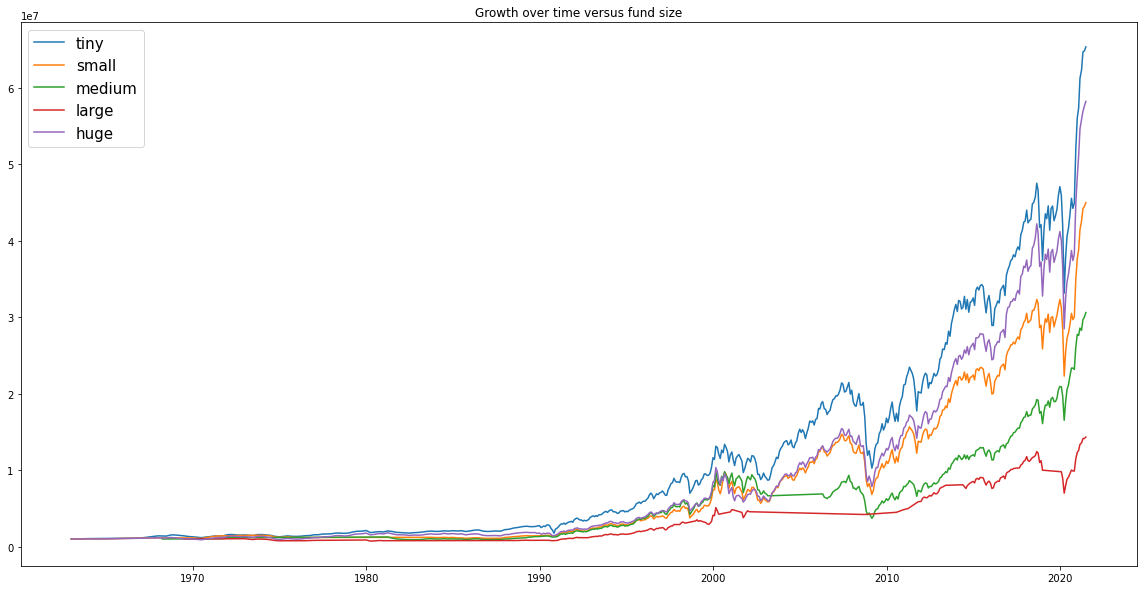

In [ ]:
plt.figure(figsize = [20,10])
plt.plot(tiny['caldt'], tiny['value'], label = 'tiny')
plt.plot(small['caldt'], small['value'], label = 'small')
plt.plot(medium['caldt'], medium['value'], label = 'medium')
plt.plot(large['caldt'], large['value'], label = 'large')
plt.plot(huge['caldt'], huge['value'], label = 'huge')
plt.title('Growth over time versus fund size')
plt.legend(prop = {'size':15}, loc = 'best')